In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (13,8)
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 16

In [165]:
doubling_time = 4 # In days
days = np.linspace(0, 100, 101)
cum_cases = 2**(days/doubling_time)
cum_cases = np.round(cum_cases).astype('int')
new_cases = np.diff(cum_cases)
total_population = 2*np.max(cum_cases)
healthy = total_population - cum_cases

Text(0.5, 0, 'Days')

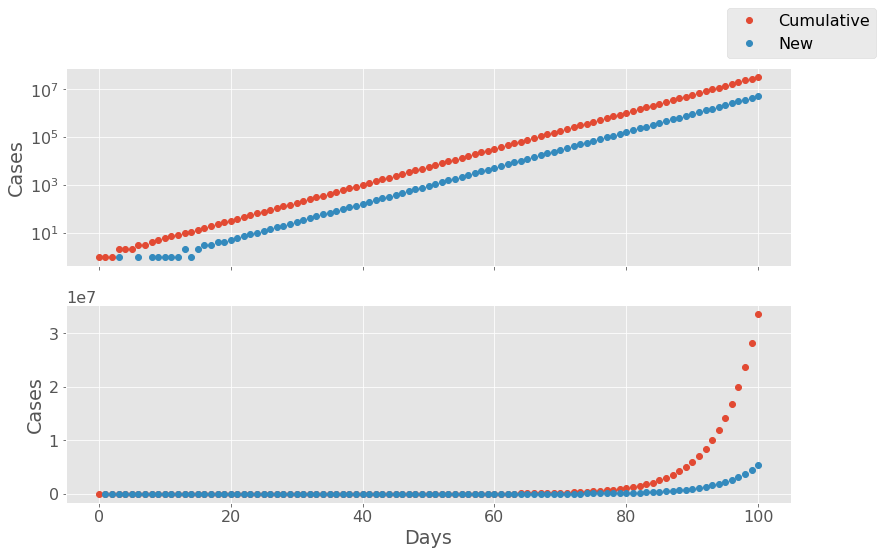

In [163]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(days, cum_cases, 'o')
ax[0].plot(days[1:], new_cases, 'o')
ax[0].set_yscale('log')
ax[0].set_ylabel('Cases')
ax[1].plot(days, cum_cases, 'o')
ax[1].plot(days[1:], new_cases, 'o')
ax[1].set_ylabel('Cases')
fig.legend(['Cumulative', 'New'])
ax[1].set_xlabel('Days')

Text(0.5, 0, 'Days')

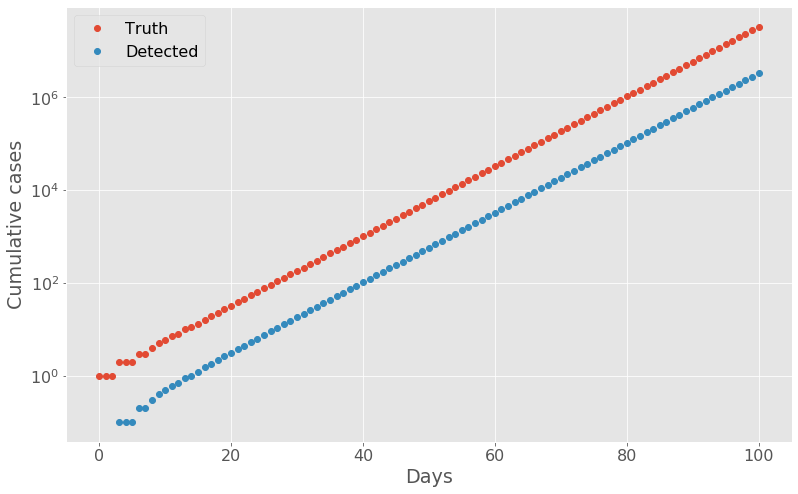

In [116]:
sampling_efficiency = .1
detected_cases_day = .1*new_cases
total_detected_cases = np.cumsum(detected_cases_day)
fig, ax = plt.subplots(1, 1)
ax.plot(days, cum_cases, 'o')
ax.plot(days[1:], total_detected_cases, 'o')
ax.set_yscale('log')
ax.legend(['Truth', 'Detected'])
ax.set_ylabel('Cumulative cases')
ax.set_xlabel('Days')

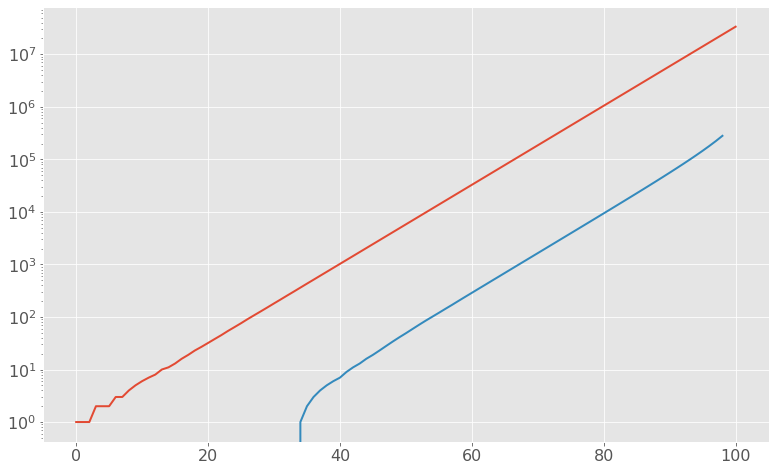

In [166]:
population_testing = 500000
prob_detection = new_cases[:-1]/healthy[1:-1]*population_testing
prob_detection = np.round(prob_detection)
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')

Text(0.5, 0, 'Days')

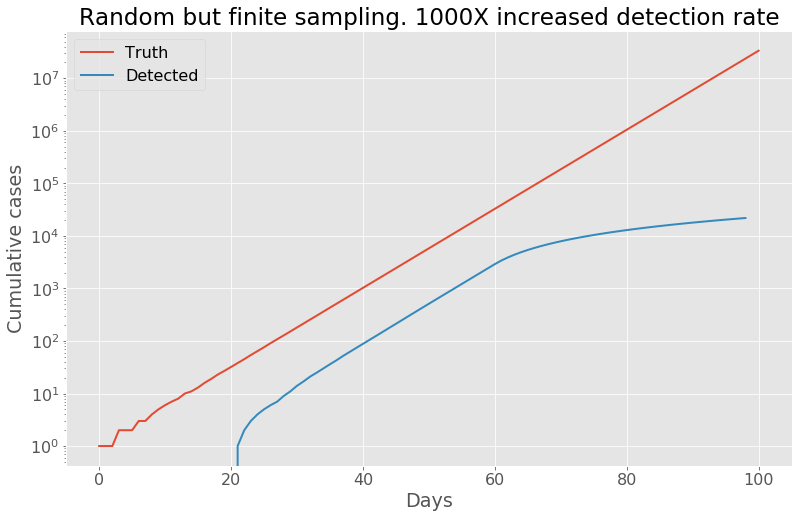

In [181]:
testing_capacity = 500
prob_detection = 10000*new_cases[:-1]/healthy[1:-1]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.legend(['Truth', 'Detected'])
plt.title('Random but finite sampling. 1000X increased detection rate')
plt.ylabel('Cumulative cases')
plt.xlabel('Days')

Text(0.5, 0, 'Days')

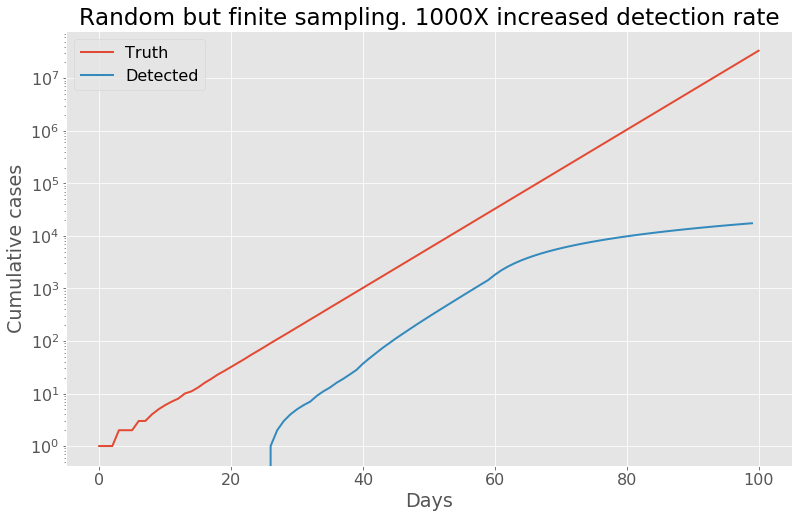

In [200]:
testing_capacity = 100 + np.heaviside(days-20, 1)*100 + np.heaviside(days-40, 1)*100+ np.heaviside(days-60, 1)*100
testing_capacity = testing_capacity[:-1]
prob_detection = 10000*new_cases/healthy[1:]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity[prob_detection>testing_capacity]
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.legend(['Truth', 'Detected'])
plt.title('Random but finite sampling. 1000X increased detection rate')
plt.ylabel('Cumulative cases')
plt.xlabel('Days')

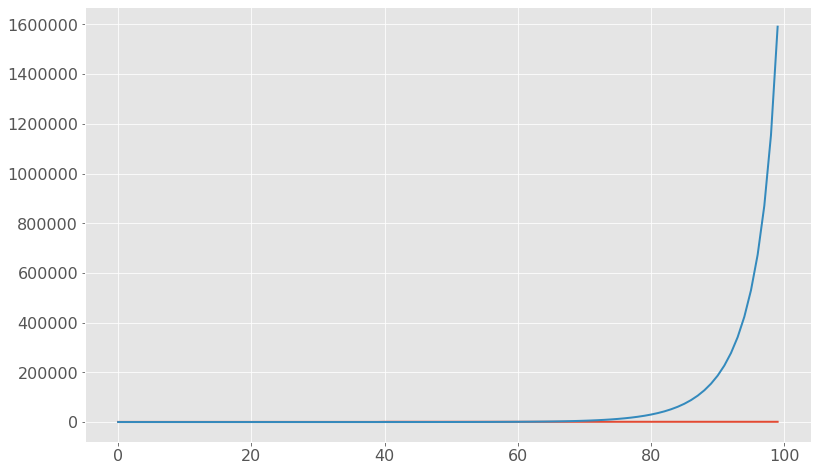

In [197]:
plt.plot(testing_capacity)
plt.plot(prob_detection)